<a href="https://colab.research.google.com/github/LANCARI/MOD-711-Machine-Learning/blob/main/Clustering_Expectation_Maximization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MOD-711 MACHINE LEARNING  (Grupo A Clustering)
## Clustering - Expectation Maximization

#### Integrantes:
- Frida Aduviri
- Licett Ancari


## 1. Descripción

El algoritmo Expectation Maximization proviene del modelo de mezcla gaussiana (GMM). El método GMM es una forma de mejorar la densidad de un conjunto dado de datos de muestra modelados como una función de la densidad de probabilidad de un método de estimación de densidad única con múltiples funciones de densidad de probabilidad gaussiana para modelar la distribución de los datos. En general, para obtener los parámetros estimados de cada componente de la mezcla gaussiana si se le da un conjunto de datos de muestra de la probabilidad logarítmica de los datos, el algoritmo EM determina el máximo para estimar el modelo óptimo.

## 2. Birtex y Referencias:

* @article{bradley1998scaling,
  title={Scaling EM (expectation-maximization) clustering to large databases},
  author={Bradley, Paul S and Fayyad, Usama and Reina, Cory and others},
  journal={Microsoft Research},
  pages={0--25},
  year={1998},
  publisher={Citeseer}
}
* @article{jung2014clustering,
  title={Clustering performance comparison using K-means and expectation maximization algorithms},
  author={Jung, Yong Gyu and Kang, Min Soo and Heo, Jun},
  journal={Biotechnology \& Biotechnological Equipment},
  volume={28},
  number={sup1},
  pages={S44--S48},
  year={2014},
  publisher={Taylor \& Francis}
}
* https://www.kaggle.com/code/charel/learn-by-example-expectation-maximization


## 3. Tipo de Modelo:

**Método de Aprendizaje:** No supervisado.

**Por Parámetro:**  Algoritmo Paramétrico

**Datos de Aprendizaje:** Funciona en un enfoque "offline"

**Resultado del Entrenamiento:**  Es un modelo


## 4. Algoritmos de Entrenamiento:

<a id='sec31'></a>
## Gaussian Mixture Model of 2 Gaussians
Two Normal distributions $N(\mu_1, \sigma_1^2)$ and $N(\mu_2, \sigma_2^2)$.

There are 5 paramaters to estimate: $\theta = (w, \mu_1, \sigma_1^2, \mu_2, \sigma_2^2)$ where $w$ is the probability that the data comes from the first normal probability distribution  (and 1-$w$) it comes from the second normal probability distribution)

The probability density function (PDF) of the mixture model is:

$$f(x | \theta) = w \  f_1(x \ | \  \mu_1, \sigma_1^2) + (1 - w) \  f_2 (x  \ | \  \mu_2, \sigma_2^2) $$  

Objective is to best fit a given probability density by finding $\theta = (w, \mu_1, \sigma_1^2, \mu_2, \sigma_2^2)$ through EM iterations


## Classic (Vanilla) EM Algorithm


## 5. Supuestos y Restricciones:

Supuestos (EM):

1. Distribución de datos como una mezcla de gaussianas: Uno de los supuestos clave de EM es que los datos se generan a partir de una mezcla de distribuciones gaussianas (Modelo de Mezcla de Gaussianas, GMM). Se supone que los datos provienen de diferentes clústeres, y cada clúster se representa mediante una distribución gaussiana con su propia media y covarianza.

2. Independencia condicional de los datos: Se supone que los datos son independientes condicionalmente dentro de cada clúster. Esto significa que, una vez que se conoce el clúster al que pertenece un punto de datos, las características de ese punto son independientes de las características de otros puntos.

Resultados (EM):

1. Parámetros del Modelo de Mezcla de Gaussianas (GMM): El resultado principal del entrenamiento de EM son los parámetros del GMM, que incluyen las medias, covarianzas y probabilidades de mezcla para cada uno de los componentes gaussianos. Estos parámetros representan la estructura de los clústeres en los datos.

2. Asignación de puntos de datos: Basado en los parámetros del GMM, se puede asignar cada punto de datos a uno de los componentes gaussianos/clústeres. Esto indica a qué clúster pertenece cada punto.

3. Probabilidades de pertenencia difusa: Además de la asignación rígida de puntos a clústeres, EM también proporciona probabilidades de pertenencia difusa. Estas probabilidades indican cuánta certeza tiene el algoritmo sobre la asignación de un punto a un clúster en particular. Es decir, cuánto pertenece un punto a cada clúster en términos de probabilidad.

4. Representación del modelo: El GMM entrenado representa la estructura de los clústeres en términos de distribuciones gaussianas y sus parámetros. Esto permite la generación de nuevos puntos de datos a partir del modelo y el análisis de la estructura de los datos en función de estas distribuciones.

In [ ]:
# import libraries

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
%matplotlib inline
#for matrix math
import numpy as np
#for normalization + probability density function computation
from scipy import stats
#for data preprocessing
import pandas as pd
from math import sqrt, log, exp, pi
from random import uniform
print("import done")

import done


![](http://)# Generate the data yourself
Select $\mu_1, \sigma_1$ and $\mu_2, \sigma_2$ to generate the data


Input Gaussian 1: μ = 2.0, σ = 4.0
Input Gaussian 2: μ = 9.0, σ = 2.0


<ipython-input-2-1ac24873f4dc>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, bins=20, kde=False);


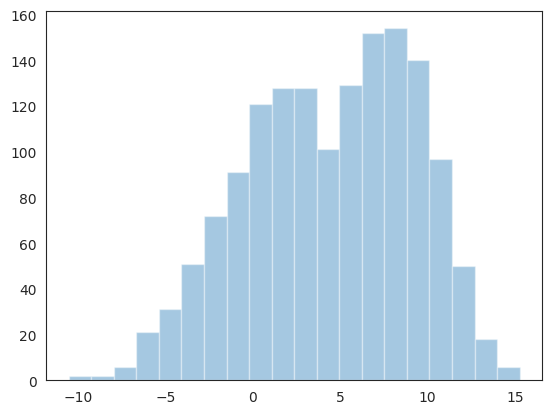

In [ ]:
random_seed=36788765
np.random.seed(random_seed)

Mean1 = 2.0  # Input parameter, mean of first normal probability distribution
Standard_dev1 = 4.0 #@param {type:"number"}
Mean2 = 9.0 # Input parameter, mean of second normal  probability distribution
Standard_dev2 = 2.0 #@param {type:"number"}

# generate data
y1 = np.random.normal(Mean1, Standard_dev1, 1000)
y2 = np.random.normal(Mean2, Standard_dev2, 500)
data=np.append(y1,y2)

# For data visiualisation calculate left and right of the graph
Min_graph = min(data)
Max_graph = max(data)
x = np.linspace(Min_graph, Max_graph, 2000) # to plot the data

print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("1", Mean1, Standard_dev1))
print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("2", Mean2, Standard_dev2))
sns.distplot(data, bins=20, kde=False);

In [ ]:
class Gaussian:
    "Model univariate Gaussian"
    def __init__(self, mu, sigma):
        #mean and standard deviation
        self.mu = mu
        self.sigma = sigma

    #probability density function
    def pdf(self, datum):
        "Probability of a data point given the current parameters"
        u = (datum - self.mu) / abs(self.sigma)
        y = (1 / (sqrt(2 * pi) * abs(self.sigma))) * exp(-u * u / 2)
        return y

    def __repr__(self):
        return 'Gaussian({0:4.6}, {1:4.6})'.format(self.mu, self.sigma)
print("done")

done


<a id='sec32'></a>
## A single Gaussion will not fit the data well
Calculating the mean and standard deviation of the dataset shows it does not fit well

Best single Gaussian: μ = 4.4, σ = 4.8


<ipython-input-4-34c4231b8481>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, bins=20, kde=False, norm_hist=True);


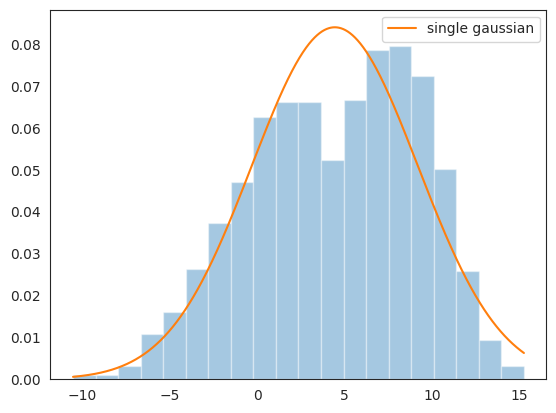

In [ ]:
#gaussian of best fit
best_single = Gaussian(np.mean(data), np.std(data))
print('Best single Gaussian: μ = {:.2}, σ = {:.2}'.format(best_single.mu, best_single.sigma))
#fit a single gaussian curve to the data
g_single = stats.norm(best_single.mu, best_single.sigma).pdf(x)
sns.distplot(data, bins=20, kde=False, norm_hist=True);
plt.plot(x, g_single, label='single gaussian');
plt.legend();

<a id='sec4'></a>
# The code for EM with 2 Gaussian mixture model

In [ ]:
class GaussianMixture_self:
    "Model mixture of two univariate Gaussians and their EM estimation"

    def __init__(self, data, mu_min=min(data), mu_max=max(data), sigma_min=1, sigma_max=1, mix=.5):
        self.data = data
        #todo the Algorithm would be numerical enhanced by normalizing the data first, next do all the EM steps and do the de-normalising at the end

        #init with multiple gaussians
        self.one = Gaussian(uniform(mu_min, mu_max),
                            uniform(sigma_min, sigma_max))
        self.two = Gaussian(uniform(mu_min, mu_max),
                            uniform(sigma_min, sigma_max))

        #as well as how much to mix them
        self.mix = mix

    def Estep(self):
        "Perform an E(stimation)-step, assign each point to gaussian 1 or 2 with a percentage"
        # compute weights
        self.loglike = 0. # = log(p = 1)
        for datum in self.data:
            # unnormalized weights
            wp1 = self.one.pdf(datum) * self.mix
            wp2 = self.two.pdf(datum) * (1. - self.mix)
            # compute denominator
            den = wp1 + wp2
            # normalize
            wp1 /= den
            wp2 /= den     # wp1+wp2= 1, it either belongs to gaussian 1 or gaussion 2
            # add into loglike
            self.loglike += log(den) #freshening up self.loglike in the process
            # yield weight tuple
            yield (wp1, wp2)

    def Mstep(self, weights):
        "Perform an M(aximization)-step"
        # compute denominators
        (left, rigt) = zip(*weights)
        one_den = sum(left)
        two_den = sum(rigt)

        # compute new means
        self.one.mu = sum(w * d  for (w, d) in zip(left, data)) / one_den
        self.two.mu = sum(w * d  for (w, d) in zip(rigt, data)) / two_den

        # compute new sigmas
        self.one.sigma = sqrt(sum(w * ((d - self.one.mu) ** 2)
                                  for (w, d) in zip(left, data)) / one_den)
        self.two.sigma = sqrt(sum(w * ((d - self.two.mu) ** 2)
                                  for (w, d) in zip(rigt, data)) / two_den)
        # compute new mix
        self.mix = one_den / len(data)


    def iterate(self, N=1, verbose=False):
        "Perform N iterations, then compute log-likelihood"
        for i in range(1, N+1):
            self.Mstep(self.Estep()) #The heart of the algorith, perform E-stepand next M-step
            if verbose:
                print('{0:2} {1}'.format(i, self))
        self.Estep() # to freshen up self.loglike

    def pdf(self, x):
        return (self.mix)*self.one.pdf(x) + (1-self.mix)*self.two.pdf(x)

    def __repr__(self):
        return 'GaussianMixture({0}, {1}, mix={2.03})'.format(self.one,
                                                              self.two,
                                                              self.mix)

    def __str__(self):
        return 'Mixture: {0}, {1}, mix={2:.03})'.format(self.one,
                                                        self.two,
                                                        self.mix)
print("done")

done


<a id='sec41'></a>
## See the algorithm in action

In [ ]:
# See the algorithm in action
n_iterations = 20
best_mix = None
best_loglike = float('-inf')
mix = GaussianMixture_self(data)
for _ in range(n_iterations):
    try:
        #train!
        mix.iterate(verbose=True)
        if mix.loglike > best_loglike:
            best_loglike = mix.loglike
            best_mix = mix

    except (ZeroDivisionError, ValueError, RuntimeWarning): # Catch division errors from bad starts, and just throw them out...
        print("one less")
        pass


 1 Mixture: Gaussian(5.64753, 3.81739), Gaussian(-3.49199, 1.73479), mix=0.869)
 1 Mixture: Gaussian(5.50461, 4.00358), Gaussian(-3.15659, 1.96324), mix=0.878)
 1 Mixture: Gaussian(5.45769, 4.07301), Gaussian(-2.93262, 2.1044), mix=0.88)
 1 Mixture: Gaussian(5.44667, 4.10235), Gaussian(-2.76597, 2.20383), mix=0.879)
 1 Mixture: Gaussian(5.45365, 4.11238), Gaussian(-2.63509, 2.27841), mix=0.876)
 1 Mixture: Gaussian(5.47113, 4.11137), Gaussian(-2.52826, 2.33666), mix=0.872)
 1 Mixture: Gaussian(5.49538, 4.10338), Gaussian(-2.43807, 2.38359), mix=0.868)
 1 Mixture: Gaussian(5.52428, 4.09068), Gaussian(-2.35954, 2.42234), mix=0.864)
 1 Mixture: Gaussian(5.55652, 4.07467), Gaussian(-2.28917, 2.45502), mix=0.859)
 1 Mixture: Gaussian(5.59125, 4.05626), Gaussian(-2.22453, 2.48309), mix=0.854)
 1 Mixture: Gaussian(5.6279, 4.03608), Gaussian(-2.16386, 2.5076), mix=0.849)
 1 Mixture: Gaussian(5.66605, 4.01458), Gaussian(-2.10595, 2.52933), mix=0.844)
 1 Mixture: Gaussian(5.70539, 3.99206), Gaus

<a id='sec42'></a>
## Find best Mixture Gaussian model

Computing best model with random restarts...

Input Gaussian 1: μ = 2.0, σ = 4.0
Input Gaussian 2: μ = 9.0, σ = 2.0
Gaussian 1: μ = 1.8, σ = 3.8, weight = 0.62
Gaussian 2: μ = 8.8, σ = 2.2, weight = 0.38


<ipython-input-7-f471cc838055>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, bins=20, kde=False, norm_hist=True);


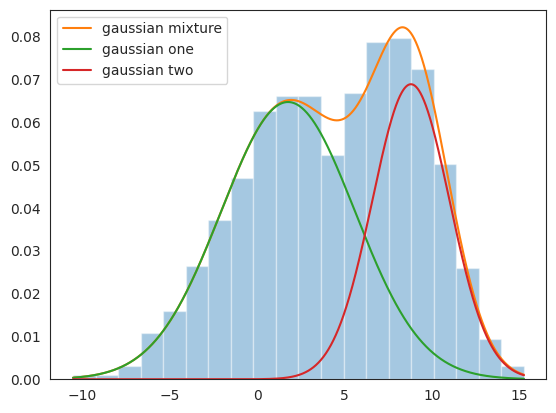

In [ ]:
# Find best Mixture Gaussian model
n_iterations = 300
n_random_restarts = 4
best_mix = None
best_loglike = float('-inf')
print('Computing best model with random restarts...\n')
for _ in range(n_random_restarts):
    mix = GaussianMixture_self(data)
    for _ in range(n_iterations):
        try:
            mix.iterate()
            if mix.loglike > best_loglike:
                best_loglike = mix.loglike
                best_mix = mix
        except (ZeroDivisionError, ValueError, RuntimeWarning): # Catch division errors from bad starts, and just throw them out...
            pass
#print('Best Gaussian Mixture : μ = {:.2}, σ = {:.2} with μ = {:.2}, σ = {:.2}'.format(best_mix.one.mu, best_mix.one.sigma, best_mix.two.mu, best_mix.two.sigma))

print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("1", Mean1, Standard_dev1))
print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("2", Mean2, Standard_dev2))
print('Gaussian {:}: μ = {:.2}, σ = {:.2}, weight = {:.2}'.format("1", best_mix.one.mu, best_mix.one.sigma, best_mix.mix))
print('Gaussian {:}: μ = {:.2}, σ = {:.2}, weight = {:.2}'.format("2", best_mix.two.mu, best_mix.two.sigma, (1-best_mix.mix)))
#Show mixture
sns.distplot(data, bins=20, kde=False, norm_hist=True);
g_both = [best_mix.pdf(e) for e in x]
plt.plot(x, g_both, label='gaussian mixture');
g_left = [best_mix.one.pdf(e) * best_mix.mix for e in x]
plt.plot(x, g_left, label='gaussian one');
g_right = [best_mix.two.pdf(e) * (1-best_mix.mix) for e in x]
plt.plot(x, g_right, label='gaussian two');
plt.legend();


<a id='sec43'></a>
## Results
The models nicely estimates our own mean entered μ and σ. With this understanding it is not hard to imagine to extend this to n-Gaussians or m-dimensions. You don't need to write complax code since these algorithms have been implemented in some excellent libraries.
<a id='sec44'></a>
## Further enhancements to the code
The Algorithm would be numerical enhanced by normalizing the data first, next do all the EM steps and do the de-normalising at the end. For me (and guess others) I needed to get to base-camp first and get the EM steps understood.
<a id='sec5'></a>
# sklearn GaussianMixture
Or we could make use of a library that already has the functionality implemented. The sklearn GaussianMixture object implements the expectation-maximization (EM) algorithm for fitting mixture-of-Gaussian models.  A GaussianMixture.fit method is provided that learns a Gaussian Mixture Model from train data. Now you can try yourself with n-Gaussians or m-dimensions.

Input Gaussian 1: μ = 2.0, σ = 4.0
Input Gaussian 2: μ = 9.0, σ = 2.0
Gaussian 1: μ = 1.7, σ = 3.8, weight = 0.61
Gaussian 2: μ = 8.8, σ = 2.2, weight = 0.39


<ipython-input-8-24e6899896dc>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, bins=20, kde=False, norm_hist=True)


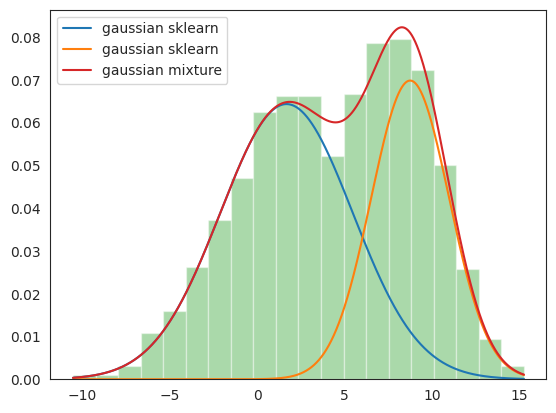

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 2, tol=0.000001)
gmm.fit(np.expand_dims(data, 1)) # Parameters: array-like, shape (n_samples, n_features), 1 dimension dataset so 1 feature
Gaussian_nr = 1
print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("1", Mean1, Standard_dev1))
print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("2", Mean2, Standard_dev2))
for mu, sd, p in zip(gmm.means_.flatten(), np.sqrt(gmm.covariances_.flatten()), gmm.weights_):
    print('Gaussian {:}: μ = {:.2}, σ = {:.2}, weight = {:.2}'.format(Gaussian_nr, mu, sd, p))
    g_s = stats.norm(mu, sd).pdf(x) * p
    plt.plot(x, g_s, label='gaussian sklearn');
    Gaussian_nr += 1
sns.distplot(data, bins=20, kde=False, norm_hist=True)
gmm_sum = np.exp([gmm.score_samples(e.reshape(-1, 1)) for e in x]) #gmm gives log probability, hence the exp() function
plt.plot(x, gmm_sum, label='gaussian mixture');
plt.legend();